# Eigenvalues and Eigenvectors in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Eigenvalues and eigenvectors are properties of a square matrix that describe its behavior under linear transformations. For a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$, an eigenvector is a non-zero vector $\mathbf{v}$ such that $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$, where $\lambda$ is the corresponding eigenvalue (a scalar).

**Mathematical Definition**:
- A vector $\mathbf{v} \neq \mathbf{0}$ is an eigenvector if:
  $$
  \mathbf{A} \mathbf{v} = \lambda \mathbf{v}
  $$
- $\lambda \in \mathbb{R}$ (or $\mathbb{C}$) is the eigenvalue, indicating the scaling factor.

**Geometric Interpretation**: Eigenvectors are directions invariant under the transformation defined by $\mathbf{A}$, scaled by the eigenvalue $\lambda$ (reversed if $\lambda < 0$).

**Examples**:
- For $\mathbf{A} = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$, eigenvectors are $[1, 0]$ and $[0, 1]$, with eigenvalues 2 and 3.
- In ML, eigenvectors of a covariance matrix represent principal components, and eigenvalues indicate their importance.

**Relevance in Mathematics**:
- **Transformation Analysis**: Reveal how matrices scale or rotate vectors.
- **Diagonalization**: Simplify matrix operations via diagonal form.
- **Stability Analysis**: Study dynamic system behavior (e.g., convergence).
- **Geometric Insights**: Quantify stretching or compression in transformations.

**Relevance in AI/ML**:
- **Data Structure**: Identify principal directions of variance (e.g., PCA).
- **Dimensionality Reduction**: Project data onto lower-dimensional spaces.
- **Spectral Methods**: Enable graph-based algorithms like spectral clustering.
- **Model Dynamics**: Analyze optimization landscapes or model stability.

**Applications Overview**:
- **PCA**: Reduce dimensionality using eigenvectors of the covariance matrix.
- **Spectral Clustering**: Use eigenvectors of graph matrices for clustering.
- **Neural Networks**: Analyze Hessian eigenvalues for optimization.
- **Recommendation Systems**: Factorize matrices using eigenvectors (SVD).
- **Graph-Based Methods**: Detect communities or rank nodes (e.g., PageRank).
- **Computer Vision**: Use eigenvectors for face recognition or image compression.

## Core Concepts and Derivations
This section covers the computation, properties, eigenspaces, and the spectral theorem for eigenvalues and eigenvectors, with examples, derivations, and visualizations.

### 2.1 Computation of Eigenvalues and Eigenvectors
**Definition**:
- **Eigenvalues**: Solve the characteristic equation:
  $$
  \det(\mathbf{A} - \lambda \mathbf{I}) = 0
  $$
- **Eigenvectors**: For each eigenvalue $\lambda$, solve:
  $$
  (\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = \mathbf{0}
  $$

**Explanation**: The characteristic equation is a polynomial of degree $n$, yielding up to $n$ eigenvalues. Eigenvectors form the null space of $\mathbf{A} - \lambda \mathbf{I}$.

**Why Necessary**:
- **Data Structure**: Reveal intrinsic matrix properties, critical for ML transformations.
- **Dimensionality Reduction**: Enable algorithms like PCA by identifying principal directions.
- **Spectral Analysis**: Support graph-based methods via eigenvalue decomposition.
- **Optimization Insights**: Provide information about transformation scaling.

**Example**: For $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$:
- Characteristic equation: $\det\begin{bmatrix} 2-\lambda & 1 \\ 1 & 2-\lambda \end{bmatrix} = (2-\lambda)^2 - 1 = 0$, so $\lambda = 3, 1$.
- For $\lambda = 3$: Solve $\begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix} \mathbf{v} = \mathbf{0}$, yielding $\mathbf{v} = [1, 1]$.

**ML Use-Case**: In PCA, eigenvectors of the covariance matrix define principal components, and eigenvalues indicate variance along those directions.

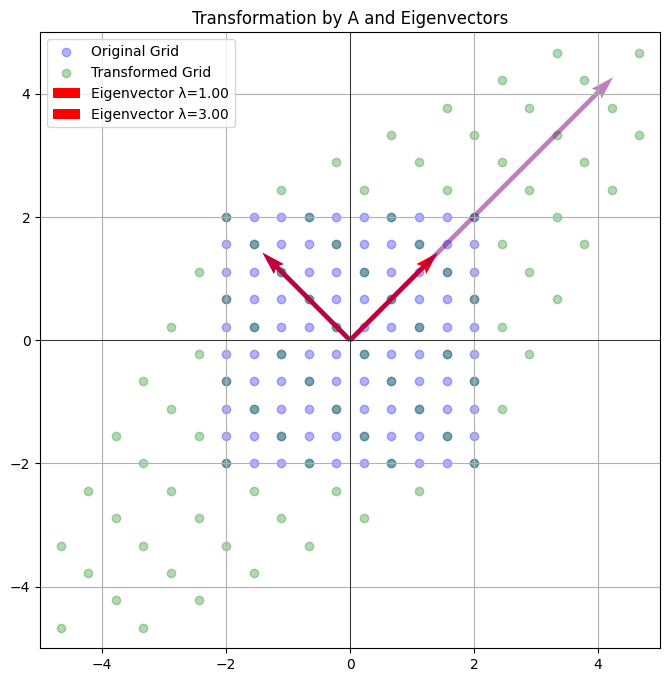

Eigenvalues:
 [1. 3.]
Eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
# Eigenvalue and Eigenvector Computation with Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[2, 1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eigh(A)  # eigh for symmetric matrices

# Function to transform a grid of points
def transform_grid(A, points):
    return np.dot(A, points.T).T

# Create a grid of points
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.ravel(), Y.ravel()])
transformed_points = transform_grid(A, points.T)

# Visualize transformation and eigenvectors
plt.figure(figsize=(8, 8))
plt.scatter(points[0], points[1], c='blue', alpha=0.3, label='Original Grid')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='green', alpha=0.3, label='Transformed Grid')
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i] * 2  # Scale for visibility
    Av = np.dot(A, v)
    plt.quiver(0, 0, v[0], v[1], color='red', label=f'Eigenvector λ={eigenvalues[i]:.2f}', scale=10)
    plt.quiver(0, 0, Av[0], Av[1], color='purple', alpha=0.5, scale=10)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Transformation by A and Eigenvectors')
plt.legend()
plt.show()

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

### 2.2 Properties of Eigenvalues and Eigenvectors
**Definition**:
- **Multiplicity**: Algebraic multiplicity (in characteristic polynomial) vs. geometric multiplicity (dimension of eigenspace).
- **Sum and Product**: Sum of eigenvalues equals trace ($\text{tr}(\mathbf{A}) = \sum a_{ii}$), product equals determinant ($\det(\mathbf{A}) = \prod \lambda_i$).
- **Orthogonality**: For symmetric matrices, eigenvectors of distinct eigenvalues are orthogonal.
- **Diagonalization**: If $\mathbf{A}$ has $n$ linearly independent eigenvectors, $\mathbf{A} = \mathbf{P} \mathbf{D} \mathbf{P}^{-1}$, where $\mathbf{D}$ is diagonal (eigenvalues), $\mathbf{P}$ contains eigenvectors.

**Explanation**: These properties simplify computations and reveal matrix structure.

**Why Necessary**:
- **Efficient Decomposition**: Orthogonality and diagonalization enable efficient ML algorithms like PCA.
- **Variance Analysis**: Eigenvalues quantify data spread in ML tasks.
- **Stability**: Trace and determinant relate to transformation behavior.
- **Model Insights**: Orthogonal eigenvectors provide non-redundant bases for data representation.

**Example**: For symmetric $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$, eigenvectors are orthogonal.

**ML Use-Case**: In PCA, orthogonal eigenvectors form a basis for the principal component subspace.

In [10]:
# Properties of Eigenvalues and Eigenvectors
import numpy as np

# Define symmetric matrix
A = np.array([[2, 1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eigh(A)  # eigh for symmetric matrices

# Verify orthogonality
v1, v2 = eigenvectors[:, 0], eigenvectors[:, 1]
dot_product = np.dot(v1, v2)

# Verify trace and determinant
trace_A = np.trace(A)
det_A = np.linalg.det(A)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Dot product of eigenvectors (should be ~0):", dot_product)
print("Trace of A:", trace_A, "Sum of eigenvalues:", np.sum(eigenvalues))
print("Determinant of A:", det_A, "Product of eigenvalues:", np.prod(eigenvalues))

Eigenvalues:
 [1. 3.]
Eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Dot product of eigenvectors (should be ~0): 2.2371143170757382e-17
Trace of A: 4 Sum of eigenvalues: 4.0
Determinant of A: 2.9999999999999996 Product of eigenvalues: 3.0


### 2.3 Eigenspaces
**Definition**: The eigenspace for eigenvalue $\lambda$ is the null space of $\mathbf{A} - \lambda \mathbf{I}$, i.e., $\{\mathbf{v} \mid (\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = \mathbf{0}\}$.

**Explanation**: Eigenspaces are subspaces containing all eigenvectors for a given eigenvalue, plus the zero vector.

**Why Necessary**:
- **Subspace Projection**: Eigenspaces define directions for data projection in ML algorithms.
- **Transformation Structure**: Reveal invariant directions under transformations.
- **Dimensionality Reduction**: Form the basis for techniques like PCA.
- **Optimization Analysis**: Eigenspaces of Hessians indicate loss surface curvature.

**Example**: For $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$, the eigenspace for $\lambda = 3$ is spanned by $[1, 1]$.

**ML Use-Case**: In PCA, eigenspaces correspond to principal components.

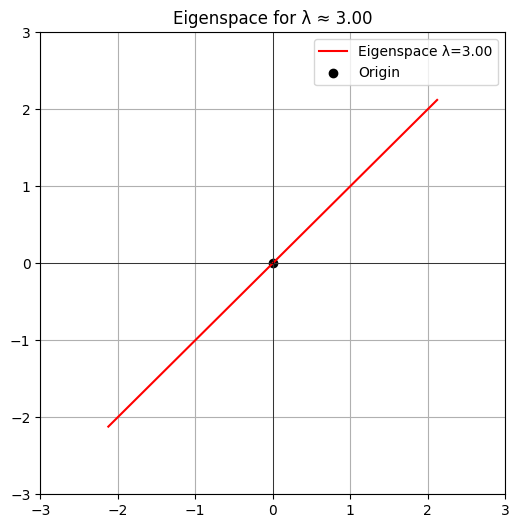

Eigenvalue: 3.0
Eigenspace basis:
 [[0.70710678]
 [0.70710678]]


In [11]:
# Eigenspace Computation with Visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

# Define matrix
A = np.array([[2, 1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Compute eigenspace for λ ≈ 3
lambda_1 = eigenvalues[1]  # Larger eigenvalue
eigenspace = null_space(A - lambda_1 * np.eye(2))

# Visualize eigenspace
plt.figure(figsize=(6, 6))
if eigenspace.size > 0:
    v = eigenspace[:, 0] * 3  # Scale for visibility
    plt.plot([-v[0], v[0]], [-v[1], v[1]], 'r-', label=f'Eigenspace λ={lambda_1:.2f}')
plt.scatter([0], [0], color='black', label='Origin')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Eigenspace for λ ≈ {lambda_1:.2f}')
plt.legend()
plt.show()

print("Eigenvalue:", lambda_1)
print("Eigenspace basis:\n", eigenspace if eigenspace.size > 0 else "Empty (check eigenvalue)")

### 2.4 Spectral Theorem (for Symmetric Matrices)
**Definition**: For a real symmetric matrix $\mathbf{A}$, there exists an orthogonal matrix $\mathbf{Q}$ (columns are eigenvectors) and a diagonal matrix $\mathbf{D}$ (eigenvalues) such that:
  $$
  \mathbf{A} = \mathbf{Q} \mathbf{D} \mathbf{Q}^T
  $$

**Explanation**: Symmetric matrices (common in ML, e.g., covariance matrices) have real eigenvalues and orthogonal eigenvectors, enabling efficient decomposition.

**Why Necessary**:
- **Efficient Decomposition**: Simplifies computations in PCA and spectral clustering.
- **Orthogonal Bases**: Provides non-redundant bases for data representation.
- **Numerical Stability**: Ensures robust algorithms for ML tasks.
- **Data Analysis**: Enables variance analysis in covariance matrices.

**Example**: For $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$, decompose using eigenvectors and eigenvalues.

**ML Use-Case**: In PCA, the spectral theorem decomposes the covariance matrix into orthogonal principal components.

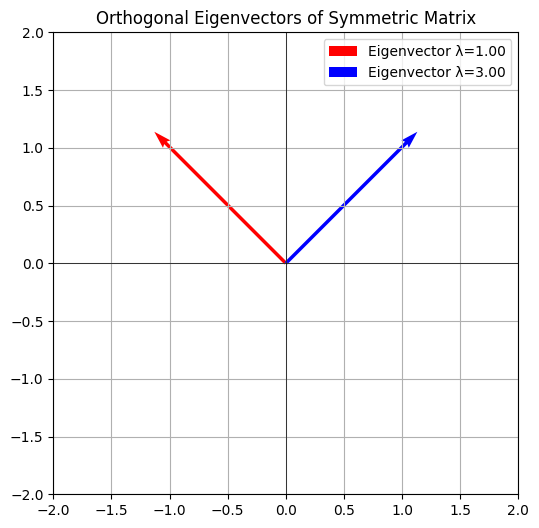

Eigenvalues:
 [1. 3.]
Orthogonal Matrix Q:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Diagonal Matrix D:
 [[1. 0.]
 [0. 3.]]
Reconstructed A (Q D Q^T):
 [[2. 1.]
 [1. 2.]]


In [12]:
# Spectral Theorem with Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define symmetric matrix
A = np.array([[2, 1], [1, 2]])
eigenvalues, Q = np.linalg.eigh(A)  # eigh for symmetric matrices
D = np.diag(eigenvalues)
A_reconstructed = Q @ D @ Q.T

# Visualize orthogonal eigenvectors
plt.figure(figsize=(6, 6))
for i in range(len(eigenvalues)):
    v = Q[:, i] * 2  # Scale for visibility
    plt.quiver(0, 0, v[0], v[1], color=['red', 'blue'][i], label=f'Eigenvector λ={eigenvalues[i]:.2f}', scale=5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Orthogonal Eigenvectors of Symmetric Matrix')
plt.legend()
plt.show()

print("Eigenvalues:\n", eigenvalues)
print("Orthogonal Matrix Q:\n", Q)
print("Diagonal Matrix D:\n", D)
print("Reconstructed A (Q D Q^T):\n", A_reconstructed)

## Applications in AI/ML
Eigenvalues and eigenvectors are applied in various ML tasks:
- **PCA**: Reduce dimensionality using eigenvectors of the covariance matrix.
- **Spectral Clustering**: Use eigenvectors of graph matrices for clustering.
- **Neural Networks**: Analyze Hessian eigenvalues for optimization.
- **Recommendation Systems**: Factorize matrices using eigenvectors (SVD).
- **Graph-Based Methods**: Detect communities or rank nodes (e.g., PageRank).
- **Computer Vision**: Use eigenvectors for face recognition or image compression.

## Practical ML Examples
Below are coded examples demonstrating eigenvalues and eigenvectors in ML contexts.

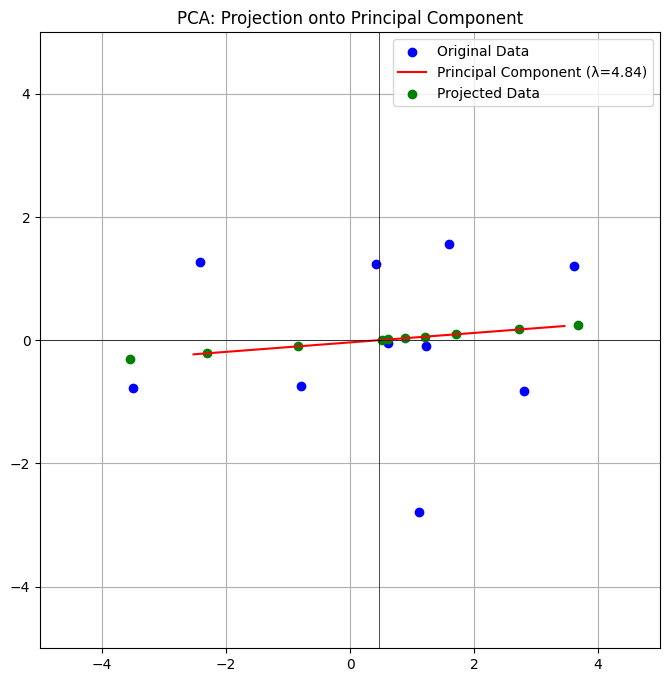

Eigenvalues:
 [1.83220741 4.83706315]
Principal Component:
 [-0.99705914 -0.07663596]
Projected Data:
 [ 1.31490693  2.78000245 -0.14839642  4.02322859 -0.04746817 -0.7501718
 -0.42888268 -3.22705543 -1.24659181 -2.26957166]


In [13]:
# Example 1: PCA (Dimensionality Reduction) with Enhanced Visualization
import numpy as np
import matplotlib.pyplot as plt

# Simulate data: 10 samples, 2 features
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[4, 1], [1, 3]], 10)

# Center the data
mean = np.mean(data, axis=0)
centered_data = data - mean

# Compute covariance matrix and eigendecomposition
cov_matrix = np.cov(centered_data.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Project onto first principal component
principal_component = eig_vecs[:, -1]  # Largest eigenvalue
projected_data = centered_data @ principal_component

# Visualize
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.plot([-3 * eig_vecs[0, -1] + mean[0], 3 * eig_vecs[0, -1] + mean[0]], 
         [-3 * eig_vecs[1, -1] + mean[1], 3 * eig_vecs[1, -1] + mean[1]], 
         'r-', label=f'Principal Component (λ={eig_vals[-1]:.2f})')
plt.scatter(projected_data * eig_vecs[0, -1] + mean[0], projected_data * eig_vecs[1, -1] + mean[1], 
            c='green', label='Projected Data')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.axhline(mean[1], color='black', linewidth=0.5)
plt.axvline(mean[0], color='black', linewidth=0.5)
plt.title('PCA: Projection onto Principal Component')
plt.legend()
plt.show()

print("Eigenvalues:\n", eig_vals)
print("Principal Component:\n", principal_component)
print("Projected Data:\n", projected_data)

In [14]:
# Example 2: Spectral Clustering (Simplified)
import numpy as np
from sklearn.cluster import KMeans

# Simulate adjacency matrix (symmetric) for a small graph
A = np.array([[0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0]])

# Compute Laplacian matrix
D = np.diag(np.sum(A, axis=1))
L = D - A

# Eigen decomposition of Laplacian
eig_vals, eig_vecs = np.linalg.eigh(L)

# Use second smallest eigenvector for clustering
fiedler_vector = eig_vecs[:, 1]  # Second smallest eigenvalue
labels = KMeans(n_clusters=2, random_state=0).fit(fiedler_vector.reshape(-1, 1)).labels_

print("Laplacian Matrix:\n", L)
print("Fiedler Vector (second smallest eigenvector):\n", fiedler_vector)
print("Cluster Labels:\n", labels)

Laplacian Matrix:
 [[ 2 -1 -1  0]
 [-1  2 -1  0]
 [-1 -1  3 -1]
 [ 0  0 -1  1]]
Fiedler Vector (second smallest eigenvector):
 [-4.08248290e-01 -4.08248290e-01  5.70146789e-16  8.16496581e-01]
Cluster Labels:
 [0 0 0 1]


## Summary
- **Key Concepts**: Eigenvalues and eigenvectors describe invariant directions and scaling factors, computed via the characteristic equation, with properties like orthogonality and diagonalization.
- **Mathematical Significance**: Enable transformation analysis, diagonalization, and stability studies.
- **AI/ML Relevance**: Support dimensionality reduction, spectral methods, and optimization analysis.
- **Next Steps**: Practice computing eigenvalues/eigenvectors, visualize their effects, and apply them to PCA or clustering.

## Tips and Practice
- **Visualize**: Use Matplotlib (as shown) or GeoGebra (https://www.geogebra.org/) to explore eigenvectors as invariant directions.
- **Practice Problems**:
  1. Compute the eigenvalues of $\begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}$.
  2. Find the eigenspace for $\lambda = 1$ of $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.
  3. Verify orthogonality of eigenvectors for $\begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$.
- **Project Idea**: Implement PCA on a dataset and visualize the principal components and projected data.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube, eigenvalue video), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), NumPy tutorials on Real Python.

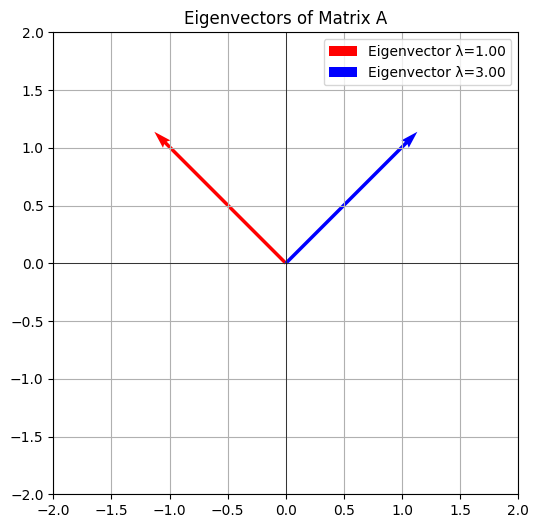

Eigenvalues:
 [1. 3.]
Eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Dot product of eigenvectors (should be ~0): 2.2371143170757382e-17
Reconstructed A:
 [[2. 1.]
 [1. 2.]]


In [15]:
# Experimentation Zone
# Try defining your own matrix and computing eigenvalues/eigenvectors!
import numpy as np
import matplotlib.pyplot as plt

# Define a matrix
A = np.array([[2, 1], [1, 2]])  # Change these values
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Visualize eigenvectors
plt.figure(figsize=(6, 6))
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i] * 2
    plt.quiver(0, 0, v[0], v[1], color=['red', 'blue'][i], label=f'Eigenvector λ={eigenvalues[i]:.2f}', scale=5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Eigenvectors of Matrix A')
plt.legend()
plt.show()

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Verify orthogonality
v1, v2 = eigenvectors[:, 0], eigenvectors[:, 1]
print("Dot product of eigenvectors (should be ~0):", np.dot(v1, v2))

# Verify diagonalization
D = np.diag(eigenvalues)
A_reconstructed = eigenvectors @ D @ eigenvectors.T
print("Reconstructed A:\n", A_reconstructed)